## IMPORT LIBRARIES & DATA

In [1]:
!pip install yellowbrick

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler # skala menjadi 0-1
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Dataset-Tugas.csv')
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## EDA

In [4]:
data.shape


(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
data.describe(include=['object'])

,class
count,150
unique,3
top,Iris-setosa
freq,50


In [9]:
data.drop(columns='class', inplace=True)

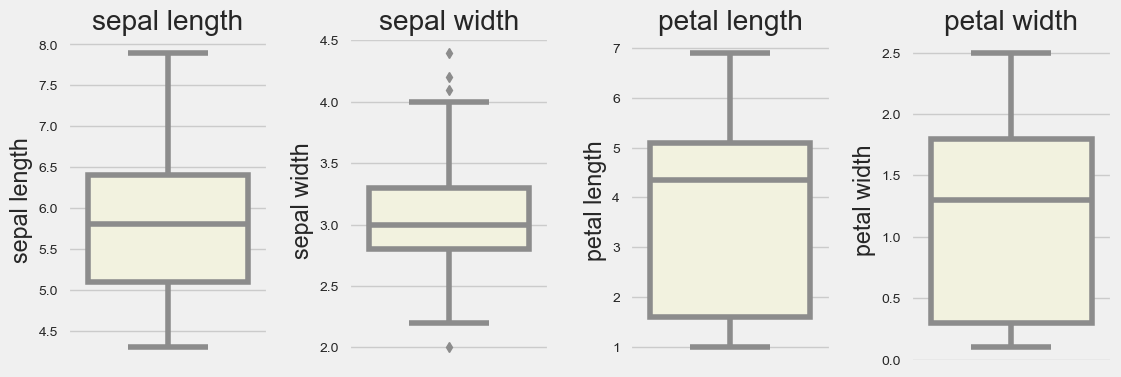

In [10]:
def box_plot(data):
    # definisikan varibel yg akan divisualisasikan
    variables = data.select_dtypes(exclude='object').columns
    
    fig, axes =plt.subplots(1, 4, figsize=(12, 4)) # sesuaikan ukutan figure
    fig.subplots_adjust(hspace=0.4, wspace=0.4) # atur jarak antar subplot
    
    # Membuat figure dan axes untuk subplot dengan ukuran 1x3
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="beige", ax=axes[i]) 
        axes[i].set_title(var) # menambahkan judul untuk setiap plot
        
    # Tampilkan plot
    plt.show()

box_plot(data)

## PRE-PROCESSING

### SCALLING

In [11]:
# initiate
scaler = MinMaxScaler()

# fit transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## MODELLING & MATRIKS EVALUASI

### 1. K-MEANS

#### Metode Elbow

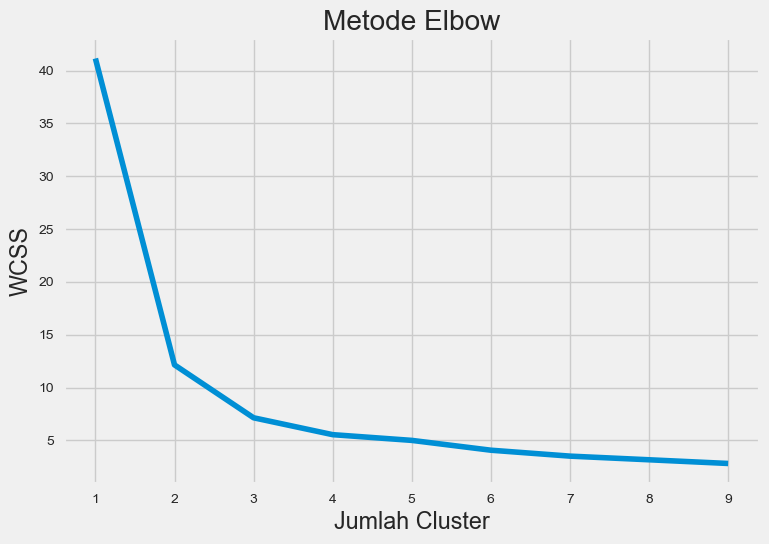

In [25]:
# Menggunakan metode elbow untuk menentukan angka cluster yg tepat
wcss = []
for i in range (1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 10), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Melalui m

#### 3 Cluster

##### Visualisasi

In [88]:
# Menjalankan K-Means Clustering ke dataset
model1 =  KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

In [77]:
# Menjalankan K-Means Clustering ke dataset
model3 =  KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred3 = model3.fit_predict(X_scaled)

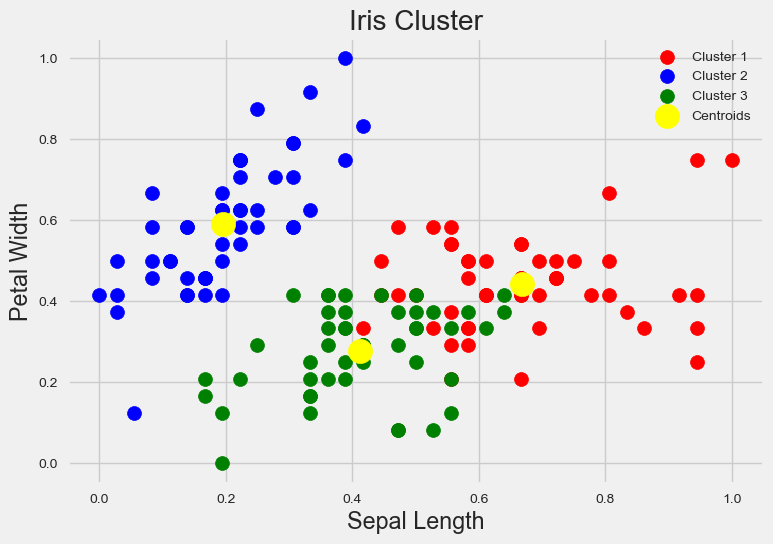

In [69]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
           s =  100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
           s =  100, c = 'blue', label = 'Cluster 2')

plt.scatter(X_scaled[y_pred1 == 2, 0], X_scaled[y_pred1 == 2, 1],
           s =  100, c = 'green', label = 'Cluster 3')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
           s =  300, c = 'yellow', label = 'Centroids')

plt.title('Iris Cluster')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [70]:
# Menghitung Silhouette_score algoritma K-Means
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)

print("Slihouette Score:", Evaluasi_KMeans)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Slihouette Score: 0.48247222154221125
Davies-Bouldin Index (DBI): 0.7874978912757876


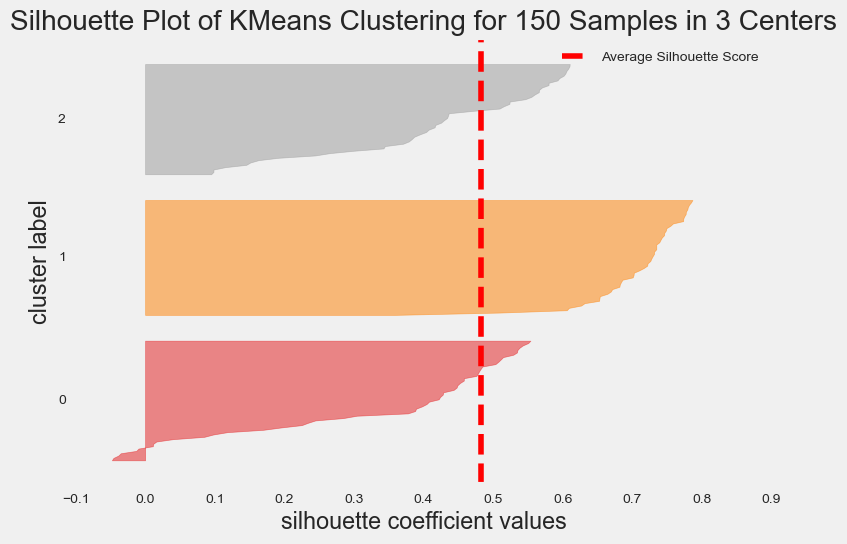

In [71]:
# Membuat Silhouette Visualisation untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

Berdasarkan hasil visualisasi silhouette menggunakan 3 klaster untuk algoritma K-Means didapatkan nilai silhouette untuk klaster 0 = 0.55 ; klaster 1 = 0.8 ; dan klaster 2 = 0.6. Rata-rata nilai silhouette dari ketiga klaster adalah 0.5.

#### b. 2 Cluster

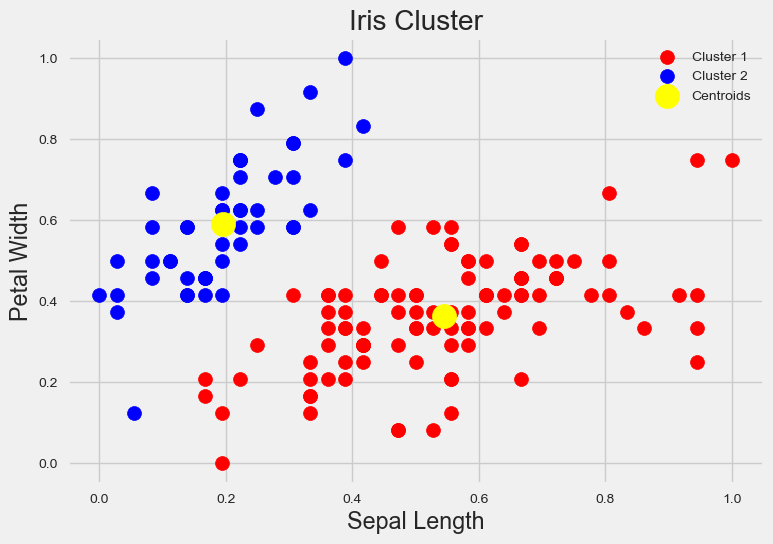

In [89]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_pred3 == 0, 0], X_scaled[y_pred3 == 0, 1],
           s =  100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred3 == 1, 0], X_scaled[y_pred3 == 1, 1],
           s =  100, c = 'blue', label = 'Cluster 2')

plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1],
           s =  300, c = 'yellow', label = 'Centroids')

plt.title('Iris Cluster')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [84]:
# Menghitung Silhouette_score algoritma K-Means
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred3)
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score3 = davies_bouldin_score(X_scaled, y_pred3)

print("Slihouette Score:", Evaluasi_KMeans)
print("Davies-Bouldin Index (DBI):", dbi_score3)

Slihouette Score: 0.6294675561906644
Davies-Bouldin Index (DBI): 0.4877048128835747


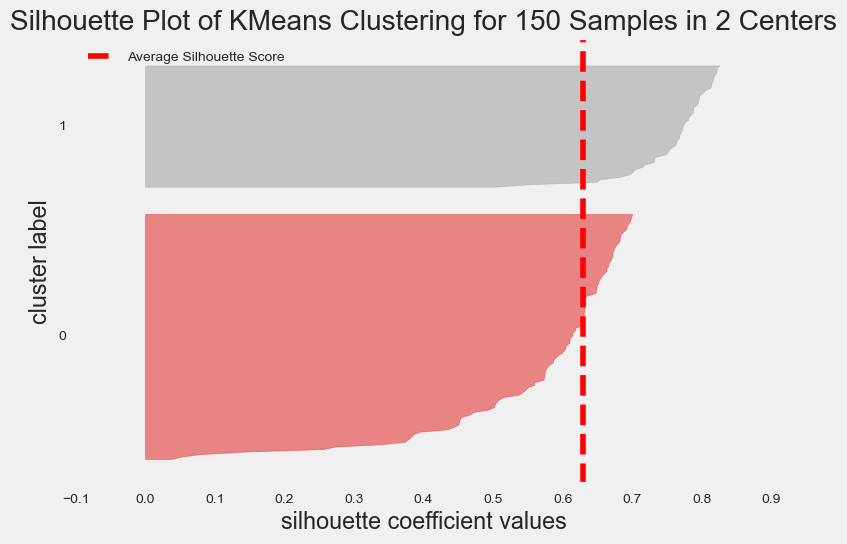

In [85]:
# Membuat Silhouette Visualisation untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model3)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

Berdasarkan hasil visualisasi silhouette menggunakan 2 klaster untuk algoritma K-Means didapatkan nilai silhouette untuk klaster 0 = 0.7 dan klaster 1 = 0.8. Rata-rata nilai silhouette dari ketiga klaster adalah 0.62.

##### Kesimpulan:

Untuk algoritma K-Means hasil nilai silhouette dan DBI nya lebih bagus yang 2 cluster (0.629 dan 0.487) dibandingkan 3 cluster (0.482 dan 0.787). Semakin mendekati 0 maka nilai DBI semakin bagus. Sedangkan semakin mendekati 1 maka semakin bagus nilai silhoutte.

### 2. DBSCAN

In [72]:
data['Hasil_cluster'] = model2.labels_
data.head()

,sepal length,sepal width,petal length,petal width,Hasil_cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Visualisasi

In [76]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=0.4, min_samples = 5)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [74]:
Evaluasi_DBScan = silhouette_score(X_scaled, y_pred2)
# Menghitung Davies-Bouldin Index (DBI) algoritma db-scan
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)

print("Silhouette Score:", Evaluasi_DBScan)
print("Davies-Bouldin Index (DBI):", dbi_score2)

Silhouette Score: 0.6294675561906644
Davies-Bouldin Index (DBI): 0.4877048128835747


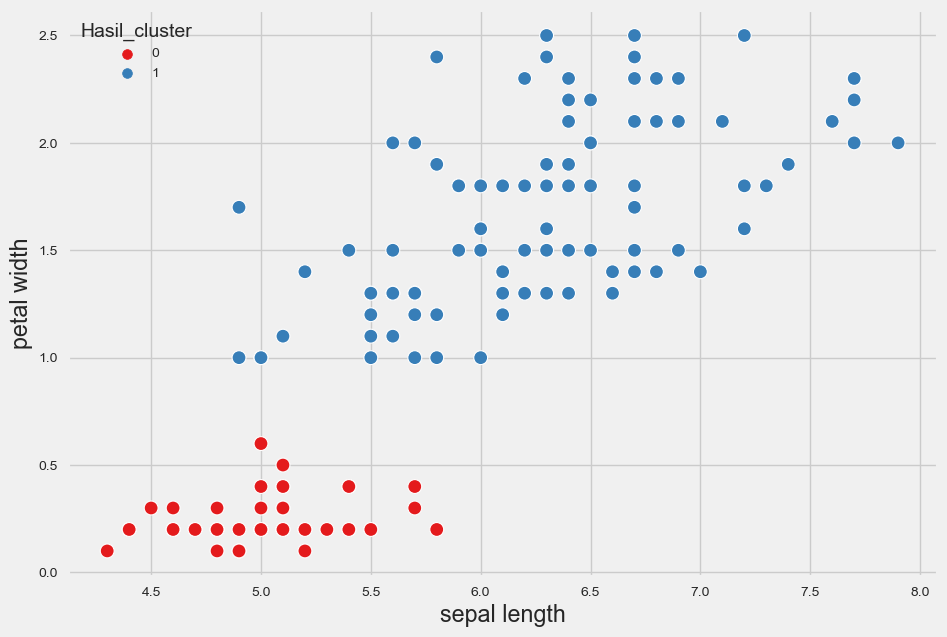

In [87]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x = 'sepal length', y = 'petal width',
               hue = 'Hasil_cluster', data = data, palette = 'Set1', s = 100);

##### Kesimpulan :

Menggunakan algoritma DBSCAN dengan 2 cluster didapatkan nilai silhouette sebesar (0.629) dan nilai DBI sebesar (0.487).